In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('raw_ppg_1.csv', sep=',', usecols=[1,2])

print(df.tail())

print(f"\nTimestamp data type : {df['Timestamp'].dtype}")
print(f"IR Value data type : {df['IR Value'].dtype}")

     Timestamp  IR Value
579      70021  105550.0
580      70141  109944.0
581      70261  105573.0
582      70382  103015.0
583      70503   99883.0

Timestamp data type : int64
IR Value data type : float64


#### Ubah Milidetik ke Detik

In [23]:
df['Timestamp'] = df['Timestamp'] / 1000

df.tail()

,Timestamp,IR Value
579,70.021,105550.0
580,70.141,109944.0
581,70.261,105573.0
582,70.382,103015.0
583,70.503,99883.0


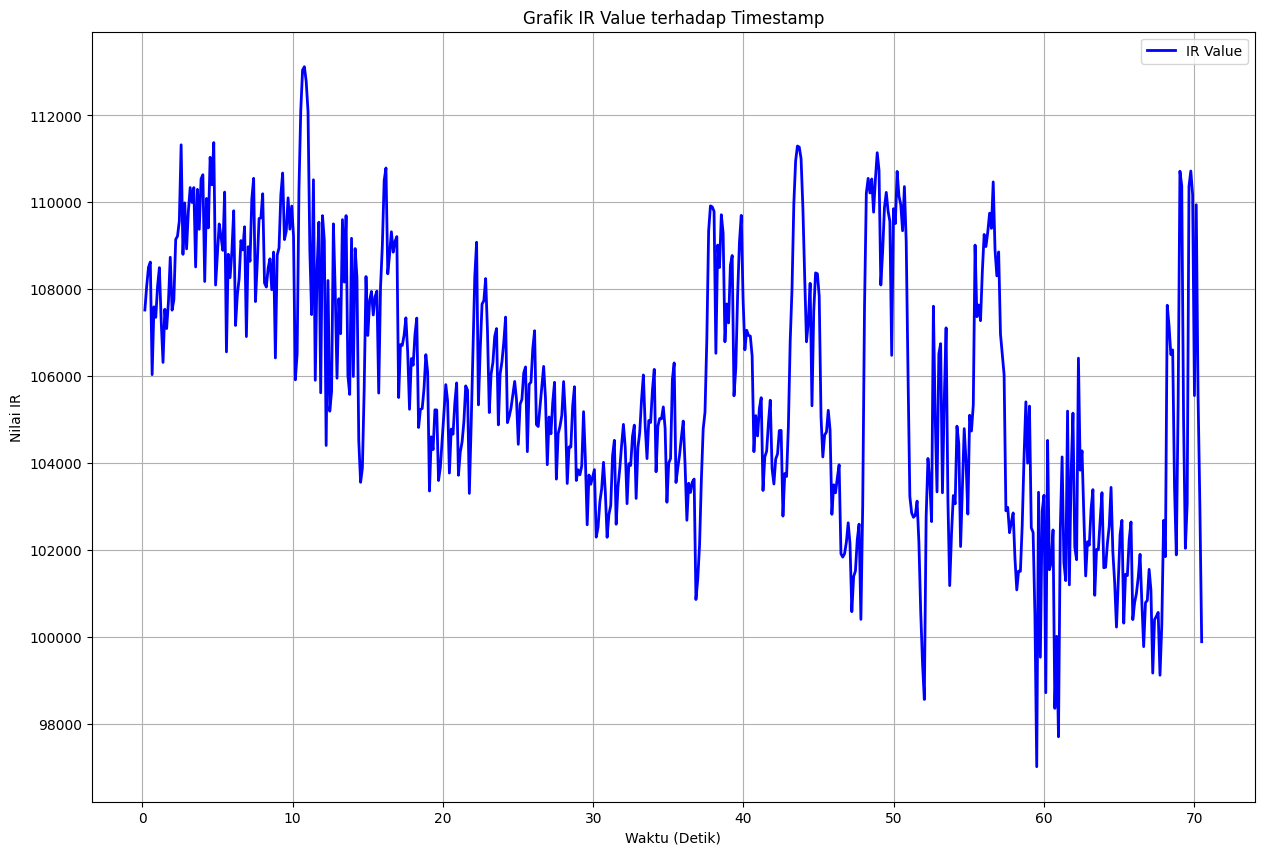

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(df['Timestamp'], df['IR Value'], label='IR Value', color='b', linewidth=2)

plt.title('Grafik IR Value terhadap Timestamp')
plt.xlabel('Waktu (Detik)')
plt.ylabel('Nilai IR')

plt.grid(True)
plt.legend()
plt.show()

In [25]:
time = df['Timestamp'].to_numpy()
ppg = df['IR Value'].to_numpy()

fs = 1 / (time[1] - time[0])
n = len(ppg)

In [26]:
def fft_transform(signal, fs, n):
    freqs = np.fft.fftfreq(n, d=1/fs)
    fft_values = np.fft.fft(signal)
    return freqs, np.abs(fft_values)

freqs_ppg, fft_ppg = fft_transform(ppg, fs, n)

In [27]:
print(f"Frequency Sampling : {fs}")
print(f"Signal Length : {n}")

Frequency Sampling : 8.264462809917354
Signal Length : 584


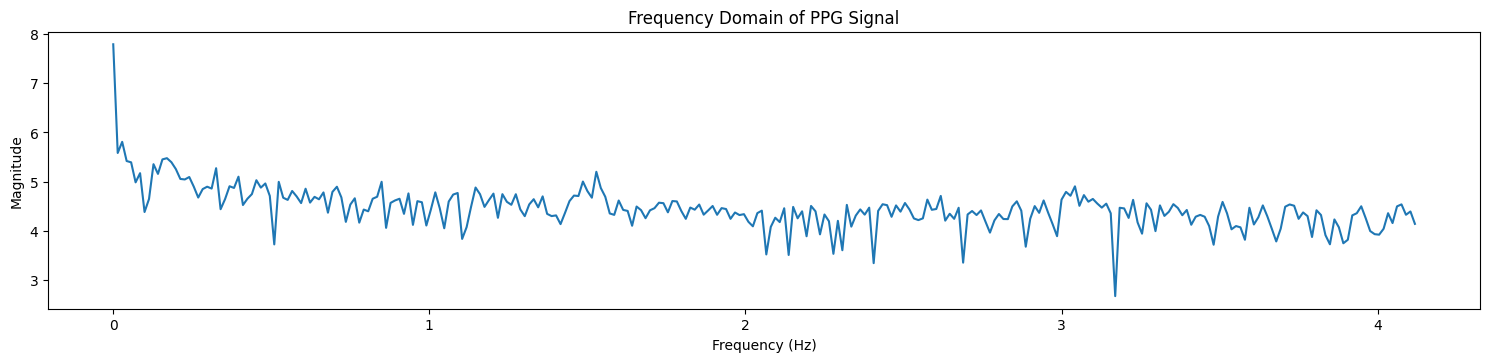

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(freqs_ppg[:len(fft_ppg)//2], np.log10(np.abs(fft_ppg[:len(fft_ppg)//2]))) 
plt.title('Frequency Domain of PPG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

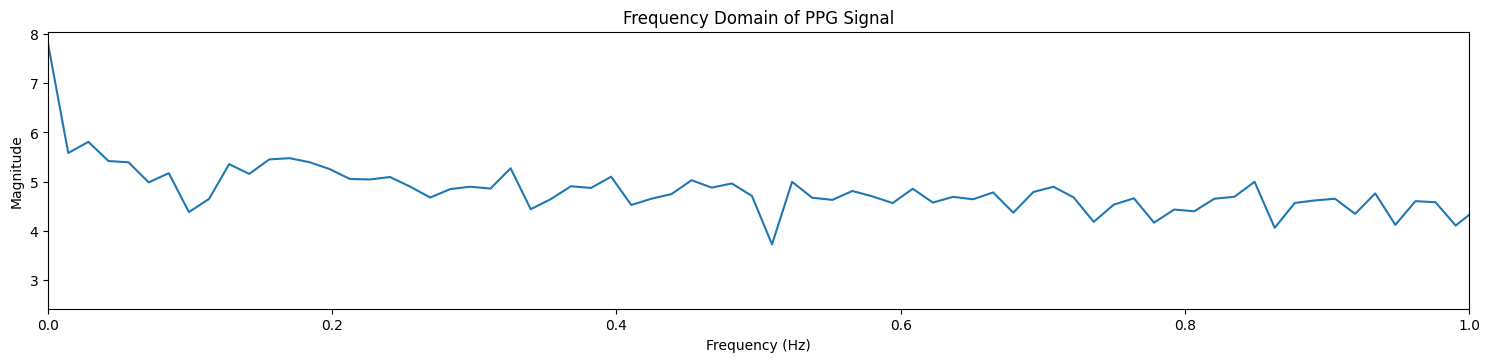

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(freqs_ppg[:len(fft_ppg)//2], np.log10(np.abs(fft_ppg[:len(fft_ppg)//2])))
plt.xlim(0, 1) 
plt.title('Frequency Domain of PPG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()